<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2 (2023)</h1>

-----

|**Maximum Marks**         |**100 marks**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **11.59M, Friday, May 19th**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this assignment:
- **LO1** - Demonstrate a conceptual understanding of database systems and architecture, data models and declarative query languages
- **LO2** - Define, query and manipulate a relational database
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems
- **LO7** - Identify potential pitfalls, and social and ethical implications of data science
- **LO8** - Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security


## Submission

You need to submit the following items:
- The notebook `Assignment_2_2023_uXXXXXXX.ipynb` (where uXXXXXXX is your uid) [Please note that if you have to pull from the upstream repo you will need to change the name back first and add your uid after the pull again]
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. Any violation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them. You can change these to Markdown cells where necessary (e.g. you may need to include some figures in your answer).
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* Your code answers will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 
* Your written answers will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

**Several notes on printing and plotting**
* When writing codes to print, your codes should <u>**include the relevant units and/or give relevant description**</u> of what you are printing. 

* A professional plot typically has the following characteristics:

    * Clear and concise labeling: A professional plot should have clear and concise labeling of the x and y axes, as well as a clear title that conveys the purpose of the plot.

    * Appropriate scales: The scales on the x and y axes should be appropriate for the data being presented. This means that the scales should be chosen so that the data is not too compressed or stretched out, and so that important features of the data are easily visible.

    * Appropriate plot type: The plot type should be appropriate for the data being presented. For example, if the data is continuous, a line plot or a scatter plot may be appropriate. If the data is categorical, a bar chart or a pie chart may be more appropriate.

    * Clarity: A professional plot should be visually clear and easy to interpret. This means that unnecessary elements should be removed, colors should be used judiciously, and the plot should be free of clutter.

    * Consistency: A professional plot should be consistent in its formatting with other plots that may be presented in the same report. This means that font sizes, line widths, and colors should be consistent across all plots.

### Enter your Student ID below:

## Data Science (40 marks)

The World Development Indicators from https://data.worldbank.org/ is a compilation of relevant, high-quality, and internationally comparable statistics about global development and the fight against poverty. The database contains 1,400 time series indicators for 217 economies and more than 40 country groups, with data for many indicators going back more than 50 years. Herein, we adopt a part of the data for the following questions. Specifically, there are 20 years of data with 20 time series indicators (may also referred to as attributes), namely: 

  - GDP (current US$)
  - GDP growth (annual %)
  - GDP per capita (current LCU)
  - Exports of goods and services (% of GDP)
  - Agriculture, forestry, and fishing, value added (% of GDP)
  - Central government debt, total (% of GDP)
  - Trade (% of GDP)
  - Tax revenue (% of GDP)
  - Services, value added (% of GDP)
  - CO2 emissions (kg per PPP \$ of GDP)
  - Compulsory education, duration (years)
  - Government expenditure on education, total (% of government expenditure)
  - Primary education, duration (years)
  - Employment to population ratio, 15+, total (%) (modeled ILO estimate)
  - Population ages 15-64, total
  - Population ages 65 and above, total
  - Population ages 65 and above (% of total population)
  - Population, female (% of total population)
  - Population, male (% of total population)
  - Population, total

In [154]:
## Package Imports
# Feel free to import other modules, provided they are a part of the standard conda distribution.
import pandas as pd
import numpy as np
import sqlite3
from sqlite3 import Error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier      
from sklearn.preprocessing import LabelEncoder          
from sklearn.preprocessing import StandardScaler       
from sklearn.model_selection import train_test_split    
from sklearn.metrics import confusion_matrix
from scipy import stats
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

### 1.0) Import the Data (0 marks)
- The data file is called `WorldPartialData.csv` in the data directory.
- Processing the data accordingly and make them ready for the use in this question. For example, you may make the years and countries as rows and the 20 time series indicators as columns.

In [200]:
data = pd.read_csv("data/WorldPartialData.csv")
#change column names for easier indexing.

data.rename( columns={ '2002 [YR2002]':'2002','2003 [YR2003]':'2003','2004 [YR2004]':'2004','2005 [YR2005]':'2005',
                       '2006 [YR2006]':'2006','2007 [YR2007]':'2007','2008 [YR2008]':'2008','2009 [YR2009]':'2009',
                       '2010 [YR2010]':'2010','2011 [YR2011]':'2011','2012 [YR2012]':'2012','2013 [YR2013]':'2013',
                       '2014 [YR2014]':'2014','2015 [YR2015]':'2015','2016 [YR2016]':'2016','2017 [YR2017]':'2017',
                       '2018 [YR2018]':'2018','2019 [YR2019]':'2019','2020 [YR2020]':'2020','2021 [YR2021]':'2021'}, 
                        inplace = 'True')

#remove last 5 rows.
data = data[:5320]
data['2002'] = pd.to_numeric(data['2002'],errors='coerce')
data['2003'] = pd.to_numeric(data['2003'],errors='coerce')
data['2004'] = pd.to_numeric(data['2004'],errors='coerce')
data['2005'] = pd.to_numeric(data['2005'],errors='coerce')
data['2006'] = pd.to_numeric(data['2006'],errors='coerce')
data['2007'] = pd.to_numeric(data['2007'],errors='coerce')
data['2008'] = pd.to_numeric(data['2008'],errors='coerce')
data['2009'] = pd.to_numeric(data['2009'],errors='coerce')
data['2010'] = pd.to_numeric(data['2010'],errors='coerce')
data['2011'] = pd.to_numeric(data['2011'],errors='coerce')
data['2012'] = pd.to_numeric(data['2012'],errors='coerce')
data['2013'] = pd.to_numeric(data['2013'],errors='coerce')
data['2014'] = pd.to_numeric(data['2014'],errors='coerce')
data['2015'] = pd.to_numeric(data['2015'],errors='coerce')
data['2016'] = pd.to_numeric(data['2016'],errors='coerce')
data['2017'] = pd.to_numeric(data['2017'],errors='coerce')
data['2018'] = pd.to_numeric(data['2018'],errors='coerce')
data['2019'] = pd.to_numeric(data['2019'],errors='coerce')
data['2020'] = pd.to_numeric(data['2020'],errors='coerce')
data['2021'] = pd.to_numeric(data['2021'],errors='coerce')

#divide them according to different series

gdp                  = data[data['Series Name'] == 'GDP (current US$)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)                                               
gdp_growth           = data[data['Series Name'] == 'GDP growth (annual %)'].copy() .reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
gdp_per_capita       = data[data['Series Name'] == 'GDP per capita (current LCU)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
exports              = data[data['Series Name'] == 'Exports of goods and services (% of GDP)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
aff_value            = data[data['Series Name'] == 'Agriculture, forestry, and fishing, value added (% of GDP)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
central_gov_debt     = data[data['Series Name'] == 'Central government debt, total (% of GDP)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
trade                = data[data['Series Name'] == 'Trade (% of GDP)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
tax_revenue          = data[data['Series Name'] == 'Tax revenue (% of GDP)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
services             = data[data['Series Name'] == 'Services, value added (% of GDP)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
co2_emissions        = data[data['Series Name'] == 'CO2 emissions (kg per PPP $ of GDP)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
comp_edu_dur         = data[data['Series Name'] == 'Compulsory education, duration (years)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
gov_exp_edu          = data[data['Series Name'] == 'Government expenditure on education, total (% of government expenditure)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)
pri_edu_dur          = data[data['Series Name'] == 'Primary education, duration (years)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
emp_pop_ratio        = data[data['Series Name'] == 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
pop_15_64            = data[data['Series Name'] == 'Population ages 15-64, total'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
pop_65_above         = data[data['Series Name'] == 'Population ages 65 and above, total'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
pop_65_above_percent = data[data['Series Name'] == 'Population ages 65 and above (% of total population)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
pop_female           = data[data['Series Name'] == 'Population, female (% of total population)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
pop_male             = data[data['Series Name'] == 'Population, male (% of total population)'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    
total_pop            = data[data['Series Name'] == 'Population, total'].copy().reset_index(drop = 'True').drop(['Series Name', 'Series Code'],axis = 1)    


id_vars = ['Country Name', 'Country Code']
#
gdp = pd.melt(gdp, id_vars=id_vars, var_name='Year')
gdp = gdp.sort_values(by=['Country Name', 'Year'])
# gdp['value'] = gdp.replace(np.nan, gdp['value'].mean())
gdp = gdp.fillna(gdp.mean())
gdp.rename(columns = {'value' : 'GDP (current US$)'}, inplace = 'True')
new_data = gdp[['Country Name', 'Country Code', 'Year']]
new_data = new_data.join(gdp['GDP (current US$)'])

# 
gdp_growth = pd.melt(gdp_growth, id_vars=id_vars, var_name='Year')
gdp_growth = gdp_growth.sort_values(by=['Country Name', 'Year'])
gdp_growth = gdp_growth.fillna(gdp_growth.mean())
gdp_growth.rename(columns = {'value' : 'GDP growth (annual %)'}, inplace = 'True')
gdp_growth = gdp_growth.fillna(gdp_growth.mean())
new_data = new_data.join(gdp_growth['GDP growth (annual %)'])

# 
gdp_per_capita = pd.melt(gdp_per_capita, id_vars=id_vars, var_name='Year')
gdp_per_capita = gdp_per_capita.sort_values(by=['Country Name', 'Year'])
gdp_per_capita = gdp_per_capita.fillna(gdp_per_capita.mean())
gdp_per_capita.rename(columns = {'value' : 'GDP per capita (current LCU)'}, inplace = 'True')
new_data = new_data.join(gdp_per_capita['GDP per capita (current LCU)'])

# 
exports = pd.melt(exports, id_vars=id_vars, var_name='Year')
exports = exports.sort_values(by=['Country Name', 'Year'])
exports = exports.fillna(exports.mean())
exports.rename(columns = {'value' : 'Exports of goods and services (% of GDP)'}, inplace = 'True')
new_data = new_data.join(exports['Exports of goods and services (% of GDP)'])

# 
aff_value = pd.melt(aff_value, id_vars=id_vars, var_name='Year')
aff_value = aff_value.sort_values(by=['Country Name', 'Year'])
aff_value = aff_value.fillna(aff_value.mean())
aff_value.rename(columns = {'value' : 'Agriculture, forestry, and fishing, value added (% of GDP)'}, inplace = 'True')
new_data = new_data.join(aff_value['Agriculture, forestry, and fishing, value added (% of GDP)'])

# 
central_gov_debt = pd.melt(central_gov_debt, id_vars=id_vars, var_name='Year')
central_gov_debt = central_gov_debt.sort_values(by=['Country Name', 'Year'])
central_gov_debt = central_gov_debt.fillna(central_gov_debt.mean())
central_gov_debt.rename(columns = {'value' : 'Central government debt, total (% of GDP)'}, inplace = 'True')
new_data = new_data.join(central_gov_debt['Central government debt, total (% of GDP)'])

#
trade = pd.melt(trade, id_vars=id_vars, var_name='Year')
trade = trade.sort_values(by=['Country Name', 'Year'])
trade = trade.fillna(trade.mean())
trade.rename(columns = {'value' : 'Trade (% of GDP)'}, inplace = 'True')
new_data = new_data.join(trade['Trade (% of GDP)'])

#
tax_revenue = pd.melt(tax_revenue, id_vars=id_vars, var_name='Year')
tax_revenue = tax_revenue.sort_values(by=['Country Name', 'Year'])
tax_revenue = tax_revenue.fillna(tax_revenue.mean())
tax_revenue.rename(columns = {'value' :'Tax revenue (% of GDP)'}, inplace = 'True')
new_data = new_data.join(tax_revenue['Tax revenue (% of GDP)'])

#
services = pd.melt(services, id_vars=id_vars, var_name='Year')
services = services.sort_values(by=['Country Name', 'Year'])
services = services.fillna(services.mean())
services.rename(columns = {'value' : 'Services, value added (% of GDP)'}, inplace = 'True')
new_data = new_data.join(services['Services, value added (% of GDP)'])

#
co2_emissions = pd.melt(co2_emissions, id_vars=id_vars, var_name='Year')
co2_emissions = co2_emissions.sort_values(by=['Country Name', 'Year'])
co2_emissions = co2_emissions.fillna(co2_emissions.mean())
co2_emissions.rename(columns = {'value' : 'CO2 emissions (kg per PPP $ of GDP)'}, inplace = 'True')
new_data = new_data.join(co2_emissions['CO2 emissions (kg per PPP $ of GDP)'])

#
comp_edu_dur = pd.melt(comp_edu_dur, id_vars=id_vars, var_name='Year')
comp_edu_dur = comp_edu_dur.sort_values(by=['Country Name', 'Year'])
comp_edu_dur = comp_edu_dur.fillna(comp_edu_dur.mean())
comp_edu_dur.rename(columns = {'value' : 'Compulsory education, duration (years)'}, inplace = 'True')
new_data = new_data.join(comp_edu_dur['Compulsory education, duration (years)'])

#
gov_exp_edu = pd.melt(gov_exp_edu, id_vars=id_vars, var_name='Year')
gov_exp_edu = gov_exp_edu.sort_values(by=['Country Name', 'Year'])
gov_exp_edu = gov_exp_edu.fillna(gov_exp_edu.mean())
gov_exp_edu.rename(columns = {'value' : 'Government expenditure on education, total (% of government expenditure)'}, inplace = 'True')
new_data = new_data.join(gov_exp_edu['Government expenditure on education, total (% of government expenditure)'])

#
pri_edu_dur = pd.melt(pri_edu_dur, id_vars=id_vars, var_name='Year')
pri_edu_dur = pri_edu_dur.sort_values(by=['Country Name', 'Year'])
pri_edu_dur = pri_edu_dur.fillna(pri_edu_dur.mean())
pri_edu_dur.rename(columns = {'value' : 'Primary education, duration (years)'}, inplace = 'True')
new_data = new_data.join(pri_edu_dur['Primary education, duration (years)'])

#
emp_pop_ratio = pd.melt(emp_pop_ratio, id_vars=id_vars, var_name='Year')
emp_pop_ratio = emp_pop_ratio.sort_values(by=['Country Name', 'Year'])
emp_pop_ratio = emp_pop_ratio.fillna(emp_pop_ratio.mean())
emp_pop_ratio.rename(columns = {'value' : 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)'}, inplace = 'True')
new_data = new_data.join(emp_pop_ratio['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'])

#
pop_15_64 = pd.melt(pop_15_64, id_vars=id_vars, var_name='Year')
pop_15_64 = pop_15_64.sort_values(by=['Country Name', 'Year'])
pop_15_64 = pop_15_64.fillna(pop_15_64.mean())
pop_15_64.rename(columns = {'value' : 'Population ages 15-64, total'}, inplace = 'True')
new_data = new_data.join(pop_15_64['Population ages 15-64, total'])

#
pop_65_above = pd.melt(pop_65_above, id_vars=id_vars, var_name='Year')
pop_65_above = pop_65_above.sort_values(by=['Country Name', 'Year'])
pop_65_above = pop_65_above.fillna(pop_65_above.mean())
pop_65_above.rename(columns = {'value' : 'Population ages 65 and above, total'}, inplace = 'True')
new_data = new_data.join(pop_65_above['Population ages 65 and above, total'])

#
pop_65_above_percent = pd.melt(pop_65_above_percent, id_vars=id_vars, var_name='Year')
pop_65_above_percent = pop_65_above_percent.sort_values(by=['Country Name', 'Year'])
pop_65_above_percent = pop_65_above_percent.fillna(pop_65_above_percent.mean())
pop_65_above_percent.rename(columns = {'value' : 'Population ages 65 and above (% of total population)'}, inplace = 'True')
new_data = new_data.join(pop_65_above_percent['Population ages 65 and above (% of total population)'])

#
pop_female = pd.melt(pop_female, id_vars=id_vars, var_name='Year')
pop_female = pop_female.sort_values(by=['Country Name', 'Year'])
pop_female = pop_female.fillna(pop_female.mean())
pop_female.rename(columns = {'value' : 'Population, female (% of total population)'}, inplace = 'True')
new_data = new_data.join(pop_female['Population, female (% of total population)'])

#
pop_male = pd.melt(pop_male, id_vars=id_vars, var_name='Year')
pop_male = pop_male.sort_values(by=['Country Name', 'Year'])
pop_male = pop_male.fillna(pop_male.mean())
pop_male.rename(columns = {'value' : 'Population, male (% of total population)'}, inplace = 'True')
new_data = new_data.join(pop_male['Population, male (% of total population)'])

#
total_pop = pd.melt(total_pop, id_vars=id_vars, var_name='Year')
total_pop = total_pop.sort_values(by=['Country Name', 'Year'])
total_pop = total_pop.fillna(total_pop.mean())
total_pop.rename(columns = {'value' : 'Population, total'}, inplace = 'True')
new_data = new_data.join(total_pop['Population, total'])


new_data['Country ID'] =  pd.factorize(new_data['Country Name'])[0]
new_data['GDP per capita (current LCU)'] = new_data['GDP (current US$)']/ new_data['Population, total']
new_data['Year ID'] = pd.factorize(new_data['Year'])[0]
new_data.rename(columns = {'GDP per capita (current LCU)' : 'GDP per capita (current US$)'}, inplace = 'True')
new_data['GDP per capita > 30000 (current US$)'] = np.where(new_data['GDP per capita (current US$)'] > 30000, 1, 0)


### 1.1) Classification using Decision trees for COMP2420 Students  (20 marks)

Part 1: Train a Decision Tree model using this dataset to predict whether a given country has GDP per capita over 30,000 US Dollar. You may consider the following as a hints. (12 marks)

- Do you need to import other packages?
- How did you prepare the dataset for this task?
- What are the hyperparameters of your model?
- How did you decide on the hyperparameters for your model? 
- Visualise the decision tree that you trained (display the tree in the notebook.)

Part 2: Based on Part 1, specify the depth and re-train a decision tree with depth 3 and another one with depth 4. Calculate the values of Gini impurity and Gini gain of the decision trees for both training and testing sets. Compare and discuss the results. (8 marks)

### 1.1) Classification using Decision trees for COMP6420 Students  (20 marks)

Part 1: Train a Decision Tree model using this dataset to predict whether a given country has GDP per capita over 30,000 US Dollar. You may consider the following as a hints. (10 marks)

- Do you need to import other packages?
- How did you prepare the dataset for this task?
- What are the hyperparameters of your model?
- How did you decide on the hyperparameters for your model? 
- Visualise the decision tree that you trained (display the tree in the notebook.)

Part 2: Based on Part 1, specify the depth and re-train a decision tree with depth 3 and another one with depth 4. Calculate the values of entropy impurity and information gain of the decision trees for both training and testing sets. Compare and discuss the results. (5 marks)

Part 3: Based on Part 1, specify the depth and re-train a decision tree with depth j, j=2,3,...,10. Calculate information gains of the decision trees for the testing sets. Plot a the curve (information gain versus j) in a figure. Discuss the results. (5 marks)

Decision Tree Regression Score: 0.819

          DEPTH 3
Decision Tree Regression Score: 0.561
-----Training  set----- 
Gini Impurity : 0.15968958242057213
Gini Gain : 0.07549935696924379
------Testing set -----
Gini Impurity : 0.15027700831024932
Gini Gain : 0.07061391489510409

          DEPTH 4
Decision Tree  Regression Score: 0.633
-----Training  set----- 
Gini Impurity : 0.15968958242057213
Gini Gain : 0.08454249370012201
------Testing set -----
Gini Impurity : 0.15027700831024932
Gini Gain : 0.07939955825019068


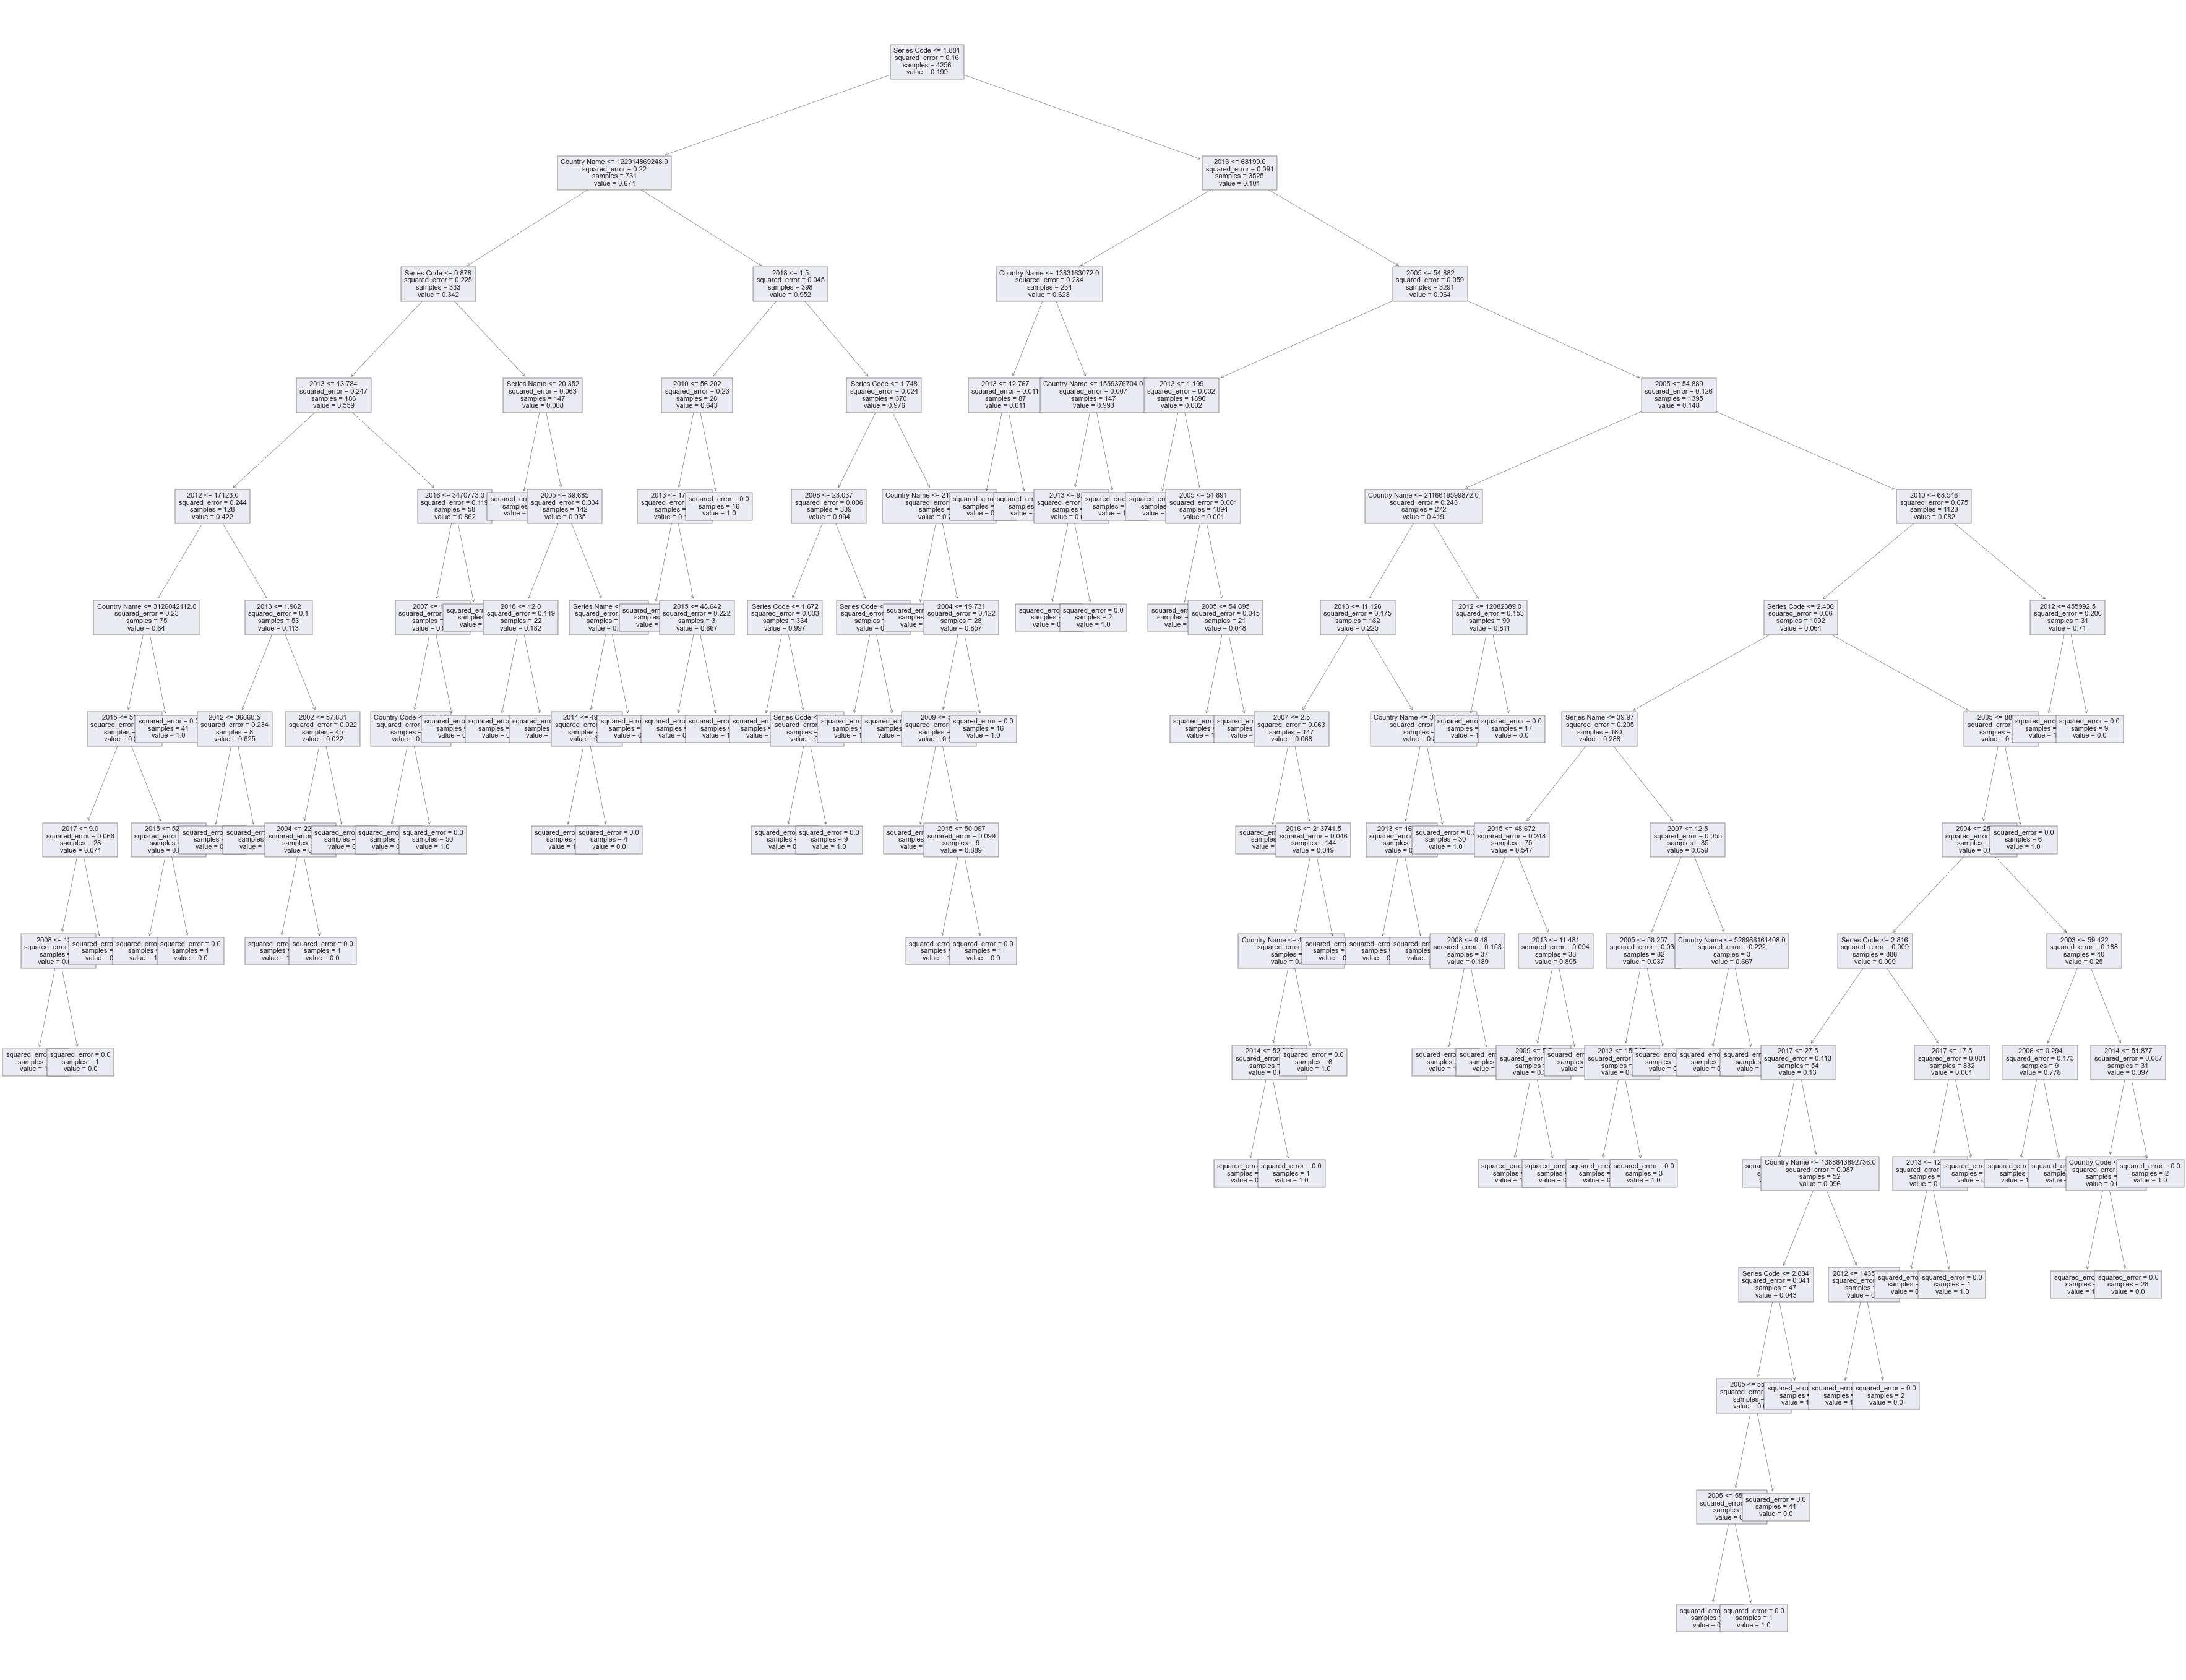

In [314]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree


#PART 1

treeData = new_data
treeData = treeData.drop('GDP per capita (current US$)', axis = 1)
# Split the data into training and testing sets
train_data, test_data = train_test_split(treeData, train_size=0.8, random_state=123) #Source:Lab06 and W5 lecturescript
x_train = train_data.to_numpy()[:,3 :-1]
y_train = train_data.to_numpy()[:, -1]

x_test = test_data.to_numpy()[:,3 :-1]
y_test = test_data.to_numpy()[:, -1] 

decision_tree = DecisionTreeRegressor() 

decision_tree.fit(x_train,y_train) 
print("Decision Tree Regression Score: {:.3}".format(decision_tree.score(x_test, y_test)))
fig = plt.figure(figsize=(45, 35))
tree.plot_tree(decision_tree, fontsize=8, feature_names=data.columns, class_names=['elliptical', 'spiral'])
print("")

#PART 2
print("          DEPTH 3")
decision_tree_depth_3 = DecisionTreeRegressor(max_depth = 3) 
decision_tree_depth_3.fit(x_train,y_train) 
print("Decision Tree Regression Score: {:.3}".format(decision_tree_depth_3.score(x_test, y_test))) 

#Training Set
gini_impurity = decision_tree_depth_3.tree_.impurity[0]  #root node
gini_leaf_nodes = decision_tree_depth_3.tree_.impurity[1:] 
gini_weight = decision_tree_depth_3.tree_.n_node_samples[1:]

gini_gain = gini_impurity - (np.average(gini_leaf_nodes, weights= gini_weight))
print("-----Training  set----- ")
print("Gini Impurity :", gini_impurity)
print("Gini Gain :", gini_gain)
#testing set
decision_tree_depth_3.fit(x_test, y_test)
gini_impurity = decision_tree_depth_3.tree_.impurity[0]  #root node
gini_leaf_nodes = decision_tree_depth_3.tree_.impurity[1:] 
gini_weight = decision_tree_depth_3.tree_.n_node_samples[1:] 
gini_gain = gini_impurity - (np.average(gini_leaf_nodes, weights= gini_weight))
print("------Testing set -----")
print("Gini Impurity :", gini_impurity)
print("Gini Gain :", gini_gain)
print("")
print("          DEPTH 4")
decision_tree_depth_4 = DecisionTreeRegressor(max_depth = 4) 
decision_tree_depth_4.fit(x_train,y_train) 
print("Decision Tree  Regression Score: {:.3}".format(decision_tree_depth_4.score(x_test, y_test)))
#Training set
gini_impurity = decision_tree_depth_4.tree_.impurity[0] #root node
gini_leaf_nodes = decision_tree_depth_4.tree_.impurity[1:] 
gini_weight = decision_tree_depth_4.tree_.n_node_samples[1:]
gini_gain = gini_impurity - (np.average(gini_leaf_nodes, weights= gini_weight))
print("-----Training  set----- ")
print("Gini Impurity :", gini_impurity)
print("Gini Gain :", gini_gain)
#Testing set
decision_tree_depth_4.fit(x_test, y_test)
gini_impurity = decision_tree_depth_4.tree_.impurity[0]  #root node
gini_leaf_nodes = decision_tree_depth_4.tree_.impurity[1:] 
gini_weight = decision_tree_depth_4.tree_.n_node_samples[1:]
gini_gain = gini_impurity - (np.average(gini_leaf_nodes, weights= gini_weight))
print("------Testing set -----")
print("Gini Impurity :", gini_impurity)
print("Gini Gain :", gini_gain)


### 1.2) Clustering for COMP2420 Students  (20 marks)

Part 1: Based on the 20 years's ***GDP per capita in US Dollar***, design and implement a K-means clustering algorithm to cluster the countries. You may consider the following as a hints. (10 marks)

- Do you need to import other packages?
- How did you prepare the dataset for this task?
- How many neighbors K, did you use for your model? 
- What are the values of the other hyperparameters of your model? 
- How did you decide on the hyper-parameters of your model? 

Part 2: Perform the Elbow method to find the optimal K. Show the plot of total of the within cluster sum of squares with respect to K. (5 marks)

Part 3: Perform the Silhouette method to find the optimal K. Show the plot of Silhouette width with respect to K. (5 marks)


### 1.2) Clustering for COMP6420 Students  (20 marks)

Part 1: Create a new indicator which integrates GDP, education, and population in a certain way. Justify why you creat this new indicator in such a way. Based on this new indicator, design and implement a K-means clustering algorithm to cluster the countries. (10 marks)

- Do you need to import other packages?
- How did you prepare the dataset for this task?
- How many neighbors K, did you use for your model? 
- What are the values of the other hyperparameters of your model? 
- How did you decide on the hyper-parameters of your model? 

Part 2: Perform the Elbow method to find the optimal K. Show the plot of total of the within cluster sum of squares with respect to K. (5 marks)

Part 3: Perform the Silhouette method to find the optimal K. Show the plot of Silhouette width with respect to K. (5 marks)



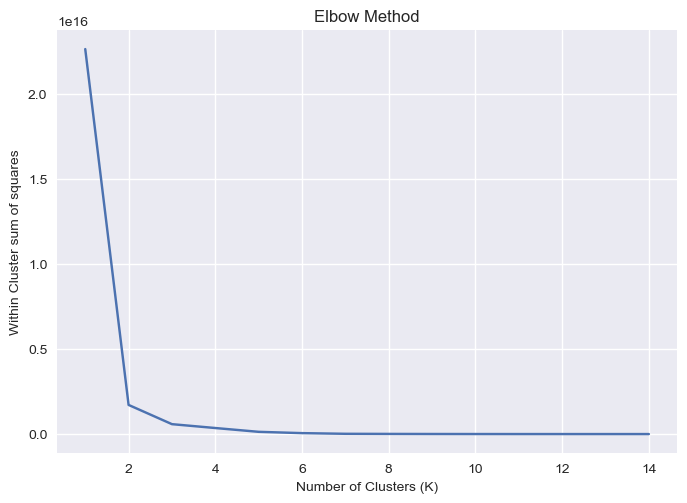

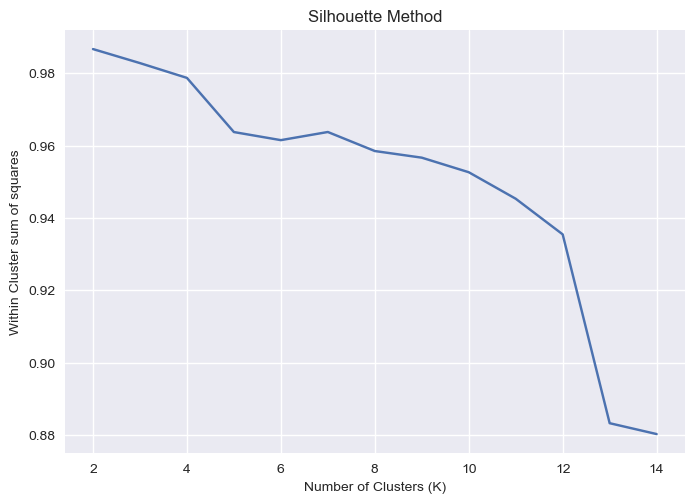

In [315]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Source :Lab06 and W5 lecturescript
mean_data = new_data.groupby('Country Name')['GDP per capita (current US$)'].mean()
mean_data
mean_data = np.array(mean_data).reshape(-1,1)
kmeans = KMeans(n_clusters=5, init = 'random')
kmeans.fit(mean_data)
y_pred = kmeans.predict(mean_data) 

##Takes a lot of time to load
#elbow method
elbow = []
x_axis = [x for x in range (1,15)]
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mean_data)
    elbow.append(kmeans.inertia_)
plt.plot(x_axis, elbow)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster sum of squares')
plt.title('Elbow Method')
plt.show()

#silouette method
silhouette = []
x_axis = [x for x in range (2,15)]
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mean_data)
    silhouette.append(silhouette_score(mean_data, kmeans.labels_))
plt.plot(x_axis, silhouette)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster sum of squares')
plt.title('Silhouette Method')
plt.show()

## Data Management
This section of the assignment has been split into two sections, based on the datasets you will be interacting with: **Sakila** and **Rumble**.

### Sakila
To test your SQL muscles, we have provided a database (and the creation scripts) for a sample SQL database called Sakila made available by MySQL under a BSD licence. The Sakila sample database is a fictitious database designed to represent a DVD rental store. The tables of the database include film, film_category, actor, customer, rental, payment and inventory among others.. We have provided the Database diagram in Q3 for reference.

Detailed information about the database can be found on the MySQL website: https://dev.mysql.com/doc/sakila/en/

### Rumble
One of the goals of this course was to introduce you to a multitude of different scenarios and datasets, and this assignment will be no exception.

The WWE Royal Rumble (Further Reading: [Wikipedia](https://en.wikipedia.org/wiki/Royal_Rumble) or [wwe.com](https://www.wwe.com/shows/royalrumble)) is an annual [professional wrestling](https://en.wikipedia.org/wiki/Professional_wrestling) event put on by the [World Wrestling Entertainment (WWE)](https://en.wikipedia.org/wiki/WWE). At the event, the marque match is a 30-man (or now woman!) "battle royale". (If none of this makes sense, don't worry. We're about to explain it.)

#### What is professional wrestling?
Professional Wrestling is a form of entertainment, quite popular in the United States and Japan. "Wrestlers" will "fight" in "matches", which are aimed to combine theater and athleticism. Matches are predetermined, participants are all willing, and the main aim is to entertain the audience. ([Further Reading](https://entertainment.howstuffworks.com/pro-wrestling.htm)).

#### So what is a "Royal Rumble"?
The "Royal Rumble" is a type of match that has 3 rules:
- Everyone gets allocated an entrance number (so, you start with 2 and new entries come in every so often).
- Only way to get rid of someone is to throw them out of the ring.
- Last person standing wins.

#### So, what has this got to do with the assignment?
Good question! All of the above is background information so you understand the dataset. In the interests of assessing your data handling, manipulation and SQL skills, you are going to be implementing an SQL database from the csv data files provided.


In [316]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
#
#

*****
## Serious SQL (25 marks)
Consider the following scenario.

> You are applying for a job as a database developer for an unnamed wrestling company. Part of the job description includes creating an automation system for running SQL queries. During the hiring process, the interviewers want to ensure you understand the SQL language. They have provided a set of questions to be answered by you, and your responses will later be reviewed by them. They are unwilling to give you access to their real database (which is mysteriously missing), so they have provided an SQLite3 database and asked you to interact with it using Python. 


Based on the above scenario, you have been asked to answer a number of questions to test your skills. You will be using the _Sakila_ database for this question. The database model is as follows:

![sakila](./img/SQLite3_Sakila_Sample_Database_ERD.png)

In the following questions, you will be asked to execute the SQL statements, and explain any reasoning as necessary. Answers to each sub-question should be obtained by a single SQL query **only**. 

**Notes**:
  - There may be slight discrepancies between the above figure and the loaded database.
  - Data can be formatted as raw printed output or a Pandas DataFrame.

In [317]:
# THIS IS YOUR CONNECTION BLOCK, DO NOT MODIFY THIS. 
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection(db_file):
    """ Connect to the specified SQLite database, if not exist, create a new one;
    :db_file: location of db to connect to
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection established!")
        
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

sakila_db = 'data/sqlite-sakila.db'
conn = create_connection(sakila_db) 
cur = conn.cursor()
# remember to close the connection when everything is done

Connection established!


### 2.1: Names of the tables (2 marks)
List the names of the tables found in this database.

In [318]:
cur.execute( "SELECT name FROM sqlite_schema WHERE type = \'table\';")
tables = cur.fetchall()
print("The tables in the database are: ")
for table in tables:
    print("                              ", table[0])


The tables in the database are: 
                               actor
                               country
                               city
                               address
                               language
                               category
                               customer
                               film
                               film_actor
                               film_category
                               film_text
                               inventory
                               staff
                               store
                               payment
                               rental


### 2.2: Number of Rentals (2 marks)
List the number of rentals in the database.

In [305]:
cur.execute("SELECT COUNT(*) FROM rental;")
count_rental = cur.fetchone()
print("The number of rentals in the database are: ", count_rental[0])

The number of rentals in the database are:  16044


### 2.3: Inactive Customers (2 marks)
There are fifteen customers who are not active. What are their first and last names?

In [306]:
cur.execute("SELECT first_name, last_name from customer where active = '0';")
customers = cur.fetchall()
print("The customers who are inactive are: ")
for i, customer in  enumerate(customers):
    print("                                 ",i+1, customer[0], customer[1])

The customers who are inactive are: 
                                  1 SANDRA MARTIN
                                  2 JUDITH COX
                                  3 SHEILA WELLS
                                  4 ERICA MATTHEWS
                                  5 HEIDI LARSON
                                  6 PENNY NEAL
                                  7 KENNETH GOODEN
                                  8 HARRY ARCE
                                  9 NATHAN RUNYON
                                  10 THEODORE CULP
                                  11 MAURICE CRAWLEY
                                  12 BEN EASTER
                                  13 CHRISTIAN JUNG
                                  14 JIMMIE EGGLESTON
                                  15 TERRANCE ROUSH


### 2.4: Cities by Country (4 marks)
What are the counts of cities for each country in the database? Display the country names with the number of cities in each country.

In [307]:
cur.execute("""SELECT  country, count(city) FROM country LEFT JOIN city ON 
            country.country_id = city.country_id GROUP BY country;""")
countries = cur.fetchall()
for i, country in enumerate(countries):
    print(i+1, country[0],":",country[1])



1 Afghanistan : 1
2 Algeria : 3
3 American Samoa : 1
4 Angola : 2
5 Anguilla : 1
6 Argentina : 13
7 Armenia : 1
8 Australia : 1
9 Austria : 3
10 Azerbaijan : 2
11 Bahrain : 1
12 Bangladesh : 3
13 Belarus : 2
14 Bolivia : 2
15 Brazil : 28
16 Brunei : 1
17 Bulgaria : 2
18 Cambodia : 2
19 Cameroon : 2
20 Canada : 7
21 Chad : 1
22 Chile : 3
23 China : 53
24 Colombia : 6
25 Congo, The Democratic Republic of the : 2
26 Czech Republic : 1
27 Dominican Republic : 3
28 Ecuador : 3
29 Egypt : 6
30 Estonia : 1
31 Ethiopia : 1
32 Faroe Islands : 1
33 Finland : 1
34 France : 4
35 French Guiana : 1
36 French Polynesia : 2
37 Gambia : 1
38 Germany : 7
39 Greece : 2
40 Greenland : 1
41 Holy See (Vatican City State) : 1
42 Hong Kong : 1
43 Hungary : 1
44 India : 60
45 Indonesia : 14
46 Iran : 8
47 Iraq : 1
48 Israel : 4
49 Italy : 7
50 Japan : 31
51 Kazakstan : 2
52 Kenya : 2
53 Kuwait : 1
54 Latvia : 2
55 Liechtenstein : 1
56 Lithuania : 1
57 Madagascar : 1
58 Malawi : 1
59 Malaysia : 3
60 Mexico : 30

### 2.5: Most rented (4 marks)
Find the name of the top customer in the database as measured by the most money spent.


In [308]:
cur.execute("""SELECT first_name, last_name FROM customer 
                LEFT JOIN payment ON customer.customer_id = payment.customer_id GROUP BY
                customer.customer_id ORDER BY sum(amount) DESC;""")

top_customer = cur.fetchone()
print("The customer who spent the most money is", top_customer[0], top_customer[1])

The customer who spent the most money is KARL SEAL


### 2.6: Not returned rentals (2 marks)
Find out how many rentals have not yet been returned.

In [309]:
cur.execute("""select count(rental_id) from rental where return_date IS NULL;""")
inventory = cur.fetchone()
print("The number of rentals not returned yet:",inventory[0])

The number of rentals not returned yet: 183


### 2.7: Finding an Actor (4 marks)
List category names for all films that featured an actor named _SUSAN DAVIS_. 


In [310]:
cur.execute("""SELECT DISTINCT(name) FROM film LEFT JOIN film_actor ON film.film_id = film_actor.film_id 
                LEFT JOIN actor ON film_actor.actor_id = actor.actor_id 
                LEFT JOIN film_category ON film.film_id = film_category.film_id 
                LEFT JOIN category ON film_category.category_id = category.category_id
                WHERE first_name = 'SUSAN' AND last_name = 'DAVIS'; """)

genres = cur.fetchall()
for i, genre in enumerate(genres):
    print(i+1, genre[0])
    


1 Horror
2 Sports
3 Classics
4 Documentary
5 Children
6 Action
7 Drama
8 Games
9 Music
10 New
11 Sci-Fi
12 Foreign
13 Travel
14 Comedy
15 Family


### 2.8: Top customers (5 marks)
Find the customers who have rented more than 40 DVDs and the total amount paid by these customers.
List the _first_name_, _last_name_ of thsese customers, along with the total number of DVDs rented and total amount paid by these customers. 

Rename the returned columns as First_Name, Last_Name, Orders and Total_Price respectively.


In [311]:
cur.execute("""SELECT first_name AS First_Name, last_name AS Last_Name , count(payment.customer_id) AS Orders,
            sum(amount) AS Total_Price FROM customer LEFT JOIN payment ON customer.customer_id = payment.customer_id
            GROUP BY customer.customer_id HAVING (Orders > 40);""")
# cur.execute("select * from payment")
customers = cur.fetchall()
col = [column[0] for column in cur.description]

for customer in customers:
    print('\n',col[0]+":", customer[0],'\n',col[1]+":", customer[1], '\n',col[2]+":", customer[2],'\n', col[3]+":",customer[3])
    
cur.close()
print()
print("Cursor closed")


 First_Name: TAMMY 
 Last_Name: SANDERS 
 Orders: 41 
 Total_Price: 155.59

 First_Name: CLARA 
 Last_Name: SHAW 
 Orders: 42 
 Total_Price: 195.58000000000007

 First_Name: ELEANOR 
 Last_Name: HUNT 
 Orders: 46 
 Total_Price: 216.5400000000001

 First_Name: MARCIA 
 Last_Name: DEAN 
 Orders: 42 
 Total_Price: 175.58

 First_Name: KARL 
 Last_Name: SEAL 
 Orders: 45 
 Total_Price: 221.5500000000001

Cursor closed


*****
## Database Design (15 marks)
<!-- You task is to design and implement a relational database for the data that we encountered in the Assignment 1 and in Question 1 of this assignment. For a refresher on the data and more information on the schema descriptions, go check the [about.md](./data/cvss/about.md) file. -->

Consider the following scenario:
> You've been successful in your application as a database developer for an unnamed wrestling company. Your managers wish to understand why it is so difficult to search through the results of past events, and to your surprise you find all the results as csv files on your computer. The previous database developer never bothered to make a database, and manually kept track of all the information of the events - making it very difficult for quick searches. You've been tasked with building a database for the company to use to fix this. Rather than starting from scratch, you're hoping you can use the event results to start filling in information. The first folder you find is called rumble.

Your task is as follows:
  - Draw a simple ER diagram showing the relationships specified below.
  - Evaluate your design with respect to normalisation considerations.
  - Implement your design in an SQLite database.

The following is the requirements brief that was provided to you by your manager in an email:
>Afternoon newbie,
>
>Our company runs a really special match called the Royal Rumble, but so far we haven't been keeping digital records of it very well. We've been running it for a while, so a lot of it is paper-based, but the previous database developer had stored it all in text files which you should have access to.
>
>So basically, the company is built on events, which we run once a year. An event would normally have a title, year, location, and attendance, although we may have to enter some of that information by ourselves later.
>
>Each event has a series of matches. Initially we only ran one match at each event, but lately we've been doing one for male and one for female. A match has a title, list of participants, how long each respective participant was in the match and how many people they eliminated, one winner, and how long the match went for. Some other organisations rate their matches, although I don't like that so don't worry about that aspect.
>
>Finally, the wrestlers, or participants, will all have a stage name, real name and gender. A lot of this information we will have to enter later, but at least we can enter in the information we have. You can just assume the records contain the stage name, not the real name.
>
>Don't worry about formatting issues; for example, if a wrestler's name is "Mankind" one event, then "Cactus Jack" another year, and "Dude Love" the year after, you can just pretend they're different wrestlers. People change their names all the time. Similarly, if the previous database designer entered a wrestler as "D'Lo Brown" in one place and "DLo Brown" in another place, you can also pretend that's two wrestlers. We'll fix that up manually later.
>
>Good luck!

Note that the data is unlikely in an ideal format, so you will need to explore and understand the data yourself before getting started. See the Rumble about.md for additional details (in a real-world situation, even this information would not be provided). We will only be able to clarify any errors or unreasonably ambiguous details. Remember to state all assumptions beforehand.

### 3.1 Design a database to match the rumble dataset provided in the assignment (7 marks).
Draw a simple ER diagram showing the relationship between the data set described in the email that you received from your manager (see above). 

__Note:__  Remember to state all assumptions beforehand. 

__Note 2:__ Diagrams can be drawn by hand and scanned/photographed, or you can use a tool such as [draw.io](https://draw.io). You should include the diagram in the `img` folder, and import it into a markdown box in your notebook. You can use the command `![er.png](./img/er.png)` where `er.png` is the name of your ER diagram file.

In [312]:
# YOUR CODE HERE


![ER.png](./img/ER.png)

#### Assumptions:
    1. An Event can have multiple matches
    2. A participant can eliminate multiple participants but can only be eliminated by one.
    3. The title in the match table should be unique.
  

### 3.2 Evaluate the design of your database with respect to the normalisation considerations (3 marks). 


### 3.3 Implement the database in an SQLite database (5 marks).
Create the database with the tables you designed above. (You are not required to fill in the tables with the data from the files.)


In [313]:

create_event_table = """
CREATE TABLE EVENT (
ID INT PRIMARY KEY NOT NULL,
TITLE VARCHAR(255) NOT NULL,
YEAR YEAR NOT NULL,
LOCATION VARCHAR(255) NOT NULL,
ATTENDANCE INT
);
"""
create_match_table = """
CREATE TABLE MATCH (
ID INT PRIMARY KEY NOT NULL,
EVENT_ID INT NOT NULL,
TITLE VARCHAR(255) NOT NULL,
WINNER INT NOT NULL,
MATCH_DURATION TIMESTAMP 'HH:MI:SS',
FOREIGN KEY (EVENT_ID) REFERENCES EVENT (ID)
);
"""
create_participant_table = """
CREATE TABLE PARTICIPANT(
ID INT PRIMARY KEY,
STAGE_NAME VARCHAR(255) NOT NULL,
REAL_NAME VARCHAR(255) NOT NULL,
GENDER CHAR(1) NOT NULL
);
"""
create_match_info_table = """
CREATE TABLE MATCHINFO(
PARTICIPANT_ID INT NOT NULL,
MATCH_ID INT NOT NULL,
ELIMINATED INT NOT NULL,
ELIMINATED_BY INT,
TIME_IN_MATCH TIMESTAMP 'HH:MI:SS',
FOREIGN KEY (PARTICIPANT_ID) REFERENCES PARTICIPANT (ID),
FOREIGN KEY (MATCH_ID) REFERENCES MATCH (ID),
FOREIGN KEY (ELIMINATED) REFERENCES PARTICIPANT (ID),
FOREIGN KEY (ELIMINATED_BY) REFERENCES PARTICIPANT (ID),
PRIMARY KEY (PARTICIPANT_ID, MATCH_ID)
);
"""


## Data Security (20 marks)

Consider the following scenario.

> You have just been put in charge information security at the Guilder National University (GNU) [Go antelopes!]. The GNU’s management board has asked you to attend their meeting and explain some issues around information security.
> 
> A comprehensive audit GNU’s information systems has been conducted, and it found hundreds of vulnerabilities. The board is extremely agitated by this, and demand that they all be fixed immediately!
>
> You need to help them understand how this is not feasible or necessarily required to avoid catastrophic failure of University systems and business operations.

### 4.1) Threats and Vulnerabilities (4 marks)

Explain the relationship between a threat and a vulnerability as it relates to risk management in information security.

### 4.2) Next Steps (3 marks)
Explain briefly what next steps you would take with the large list of vulnerabilities identified.

### 4.3) Risk Management (3 marks)
Explain to the board why risk management must be used in information security.

Consider the following continuation of the scenario introduced above.

> You have a discussion about ransomware strategy. The board is considering its position. One board member comments “If we get ransomed, we should just pay the ransom, then we get our data back. It will be all over and we can get on with business.”

### 4.4) Non-depleting Resource (4 marks)
Explain to the board what is meant by ‘information is a non-depleting resource’.

### 4.5) Managing Up (2 marks)
What are your thoughts on the board member's comment in light of this explanation?

### 4.6 Defense-In-Depth (4 marks)
What is 'defence-in-depth'? Why should it be a core information security strategy for GNU?
